In [14]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#Load data
advertising = pd.read_csv("advertising.csv")

In [16]:
#Data inspection
print(advertising.info())
print(advertising.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [17]:
#Data cleaning
print("Missing values percentage:\n", advertising.isnull().sum() * 100 / advertising.shape[0])


Missing values percentage:
 TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64


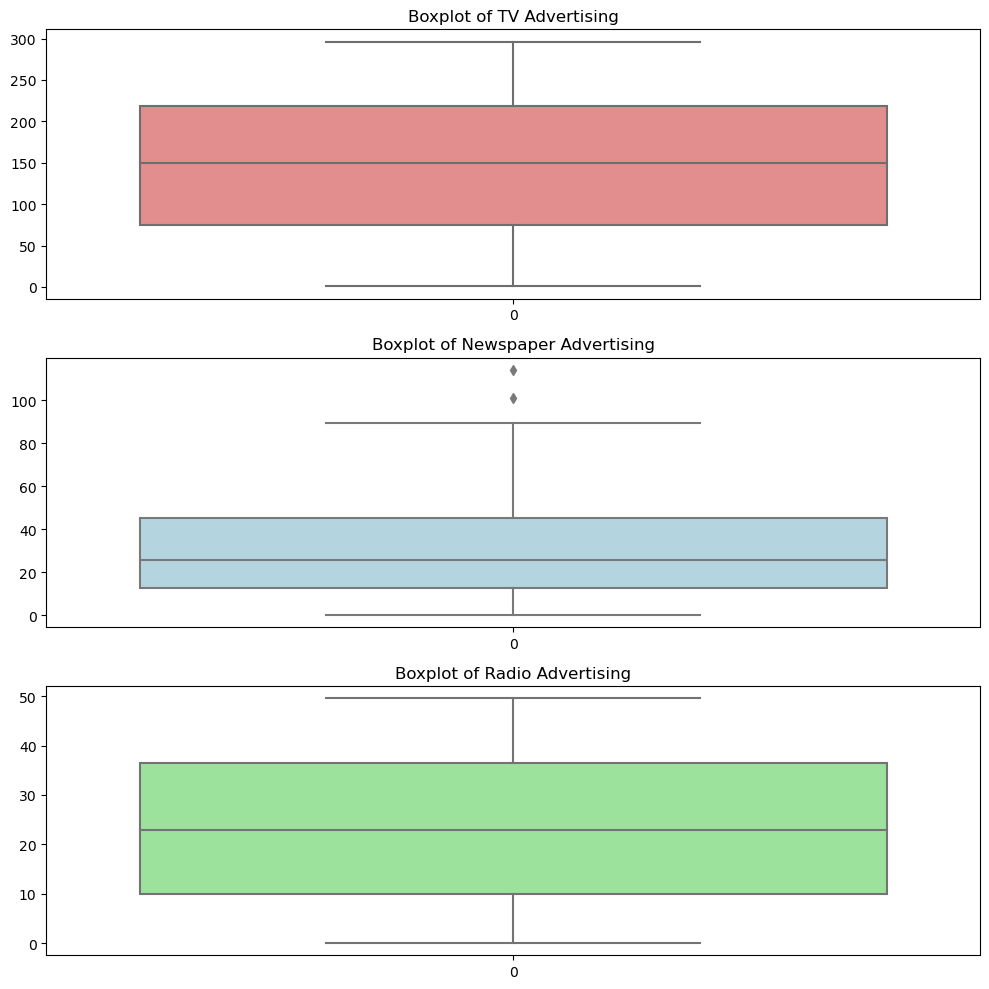

In [18]:
#Outlier analysis
fig, axs = plt.subplots(3, figsize=(10, 10))
sns.boxplot(advertising['TV'], ax=axs[0], color='lightcoral')
axs[0].set_title('Boxplot of TV Advertising')
sns.boxplot(advertising['Newspaper'], ax=axs[1], color='lightblue')
axs[1].set_title('Boxplot of Newspaper Advertising')
sns.boxplot(advertising['Radio'], ax=axs[2], color='lightgreen')
axs[2].set_title('Boxplot of Radio Advertising')
plt.tight_layout()
plt.show()

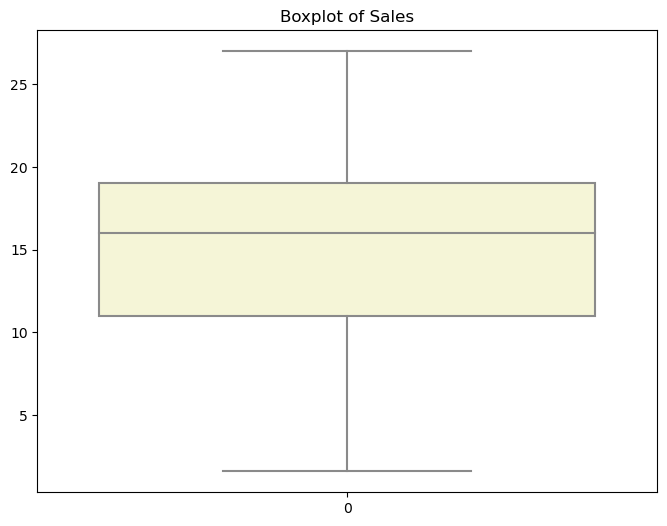

In [19]:
#Exploratory data analysis
plt.figure(figsize=(8, 6))
sns.boxplot(advertising['Sales'], color='lightgoldenrodyellow')
plt.title('Boxplot of Sales')
plt.show()


C:\Users\Muska\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


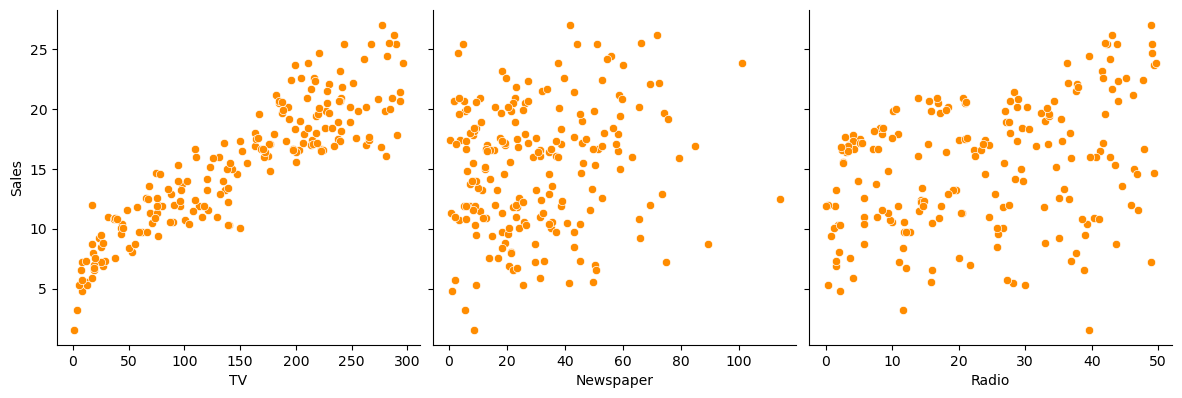

In [20]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter', plot_kws={'color': 'darkorange'})
plt.show()

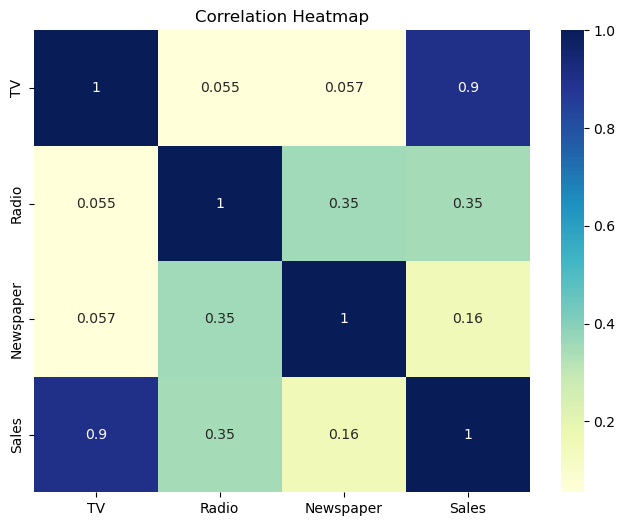

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [22]:
#Linear regression model
X = advertising[['TV']]
y = advertising['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [23]:
#Building the model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        18:27:18   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

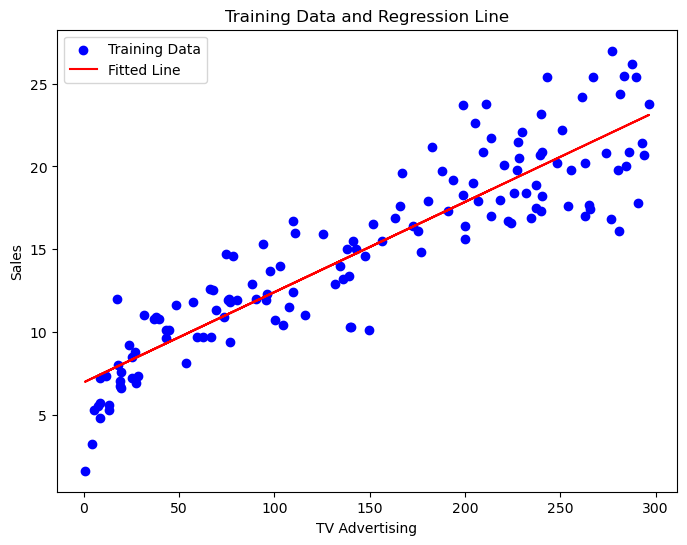

In [24]:
#Plot regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, lr.params['const'] + lr.params['TV'] * X_train, 'r', label='Fitted Line')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Training Data and Regression Line')
plt.legend()
plt.show()

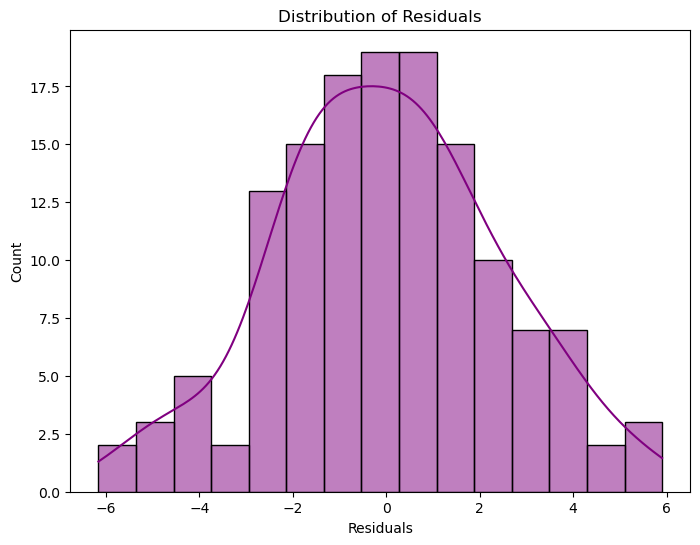

In [25]:
#Model evaluation
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

plt.figure(figsize=(8, 6))
sns.histplot(res, bins=15, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

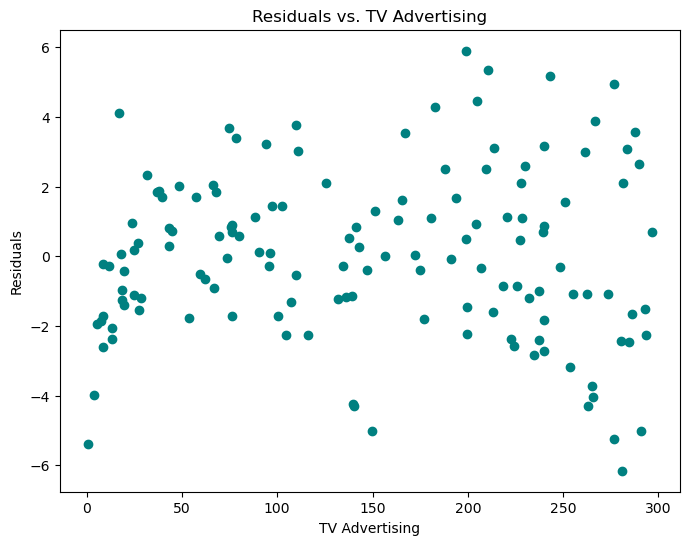

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, res, color='teal')
plt.xlabel('TV Advertising')
plt.ylabel('Residuals')
plt.title('Residuals vs. TV Advertising')
plt.show()


In [27]:
#Test set predictions
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


RMSE: 2.019296008966232
R-squared: 0.7921031601245659


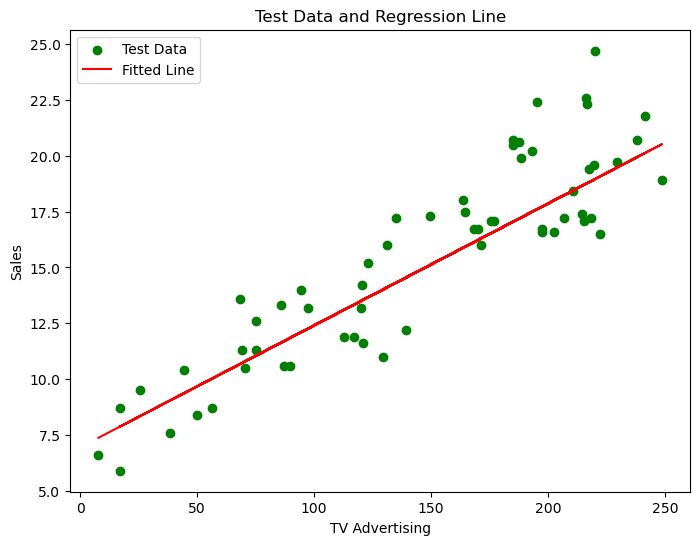

In [28]:
#Visualization of the fit on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, lr.params['const'] + lr.params['TV'] * X_test, 'r', label='Fitted Line')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Test Data and Regression Line')
plt.legend()
plt.show()